# Illustration of the feedforward neural network's performance for a regression task using the example of approximating two- and three-dimensional functions on a given interval

In [1]:
import time

import matplotlib.pyplot as plt
import torch

from vladk_neural_network.model.activation import Linear, Relu
from vladk_neural_network.model.base import NeuralNetwork
from vladk_neural_network.model.layer import FullyConnected, Input
from vladk_neural_network.model.loss import MeanSquaredError
from vladk_neural_network.model.metric import R2Score
from vladk_neural_network.model.optimizer import SGD, Adam

## Functions (2d and 3d) whose values we will predict using a neural network

In [2]:
def func_quad(arg):
    return 0.5 * arg**2 + 2 * arg - 1

def func_linear(arg):
    return -1.0 * arg - 1

def func_quad_3d(arg_x, arg_y):
    return 0.2 * arg_x**2 + 0.2 * arg_y**2

def func_sin_plus_cos_3d(arg_x, arg_y):
    return torch.sin(arg_x) + torch.cos(arg_y)

## Helper functions for plotting graphs of functions and displaying changes in loss and R2 score with the change of epochs

In [3]:
def plot_func(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [4]:
def plot_func_3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, cmap="viridis")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [6]:
def plot_r2_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

## Functions for generating train/test data

In [7]:
def generate_train_test_data(func):

    x = torch.linspace(-5, 5, 100)

    train_data = []

    for x_i in x:
        train_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    x = torch.linspace(-5, 5, 30)

    test_data = []

    for x_i in x:
        test_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    return train_data, test_data

In [8]:
def generate_train_test_data_3d(func_3d):

    x = torch.linspace(-5, 5, 50)
    y = torch.linspace(-5, 5, 50)
    x, y = torch.meshgrid(x, y, indexing="ij")

    train_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            train_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    x = torch.linspace(-5, 5, 30)
    y = torch.linspace(-5, 5, 30)
    x, y = torch.meshgrid(x, y, indexing="ij")

    test_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            test_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    return train_data, test_data

## Creating model for predicting values of the linear function "y = −x − 1" and ploting graphs and changes for loss and r2 score

In [9]:
train_dataset, test_dataset = generate_train_test_data(func_linear)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=SGD(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 50

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/50, train loss: 2.4676, train R2 score: 0.4195, test loss: 0.5986, test R2 score: 0.8656, epoch time: 0.048s
Epoch: 2/50, train loss: 0.1536, train R2 score: 0.9639, test loss: 0.0284, test R2 score: 0.9936, epoch time: 0.035s
Epoch: 3/50, train loss: 0.0189, train R2 score: 0.9956, test loss: 0.0145, test R2 score: 0.9967, epoch time: 0.028s
Epoch: 4/50, train loss: 0.0111, train R2 score: 0.9974, test loss: 0.0088, test R2 score: 0.998, epoch time: 0.03s
Epoch: 5/50, train loss: 0.0075, train R2 score: 0.9982, test loss: 0.0064, test R2 score: 0.9986, epoch time: 0.03s
Epoch: 6/50, train loss: 0.0055, train R2 score: 0.9987, test loss: 0.0052, test R2 score: 0.9988, epoch time: 0.031s
Epoch: 7/50, train loss: 0.0044, train R2 score: 0.999, test loss: 0.004, test R2 score: 0.9991, epoch time: 0.032s
Epoch: 8/50, train loss: 0.0036, train R2 score: 0.9992, test loss: 0.0032, test R2 score: 0.9993, epoch time: 0.032s
Epoch: 9/50, train loss: 0.0029, train R2 score: 0.9993, test

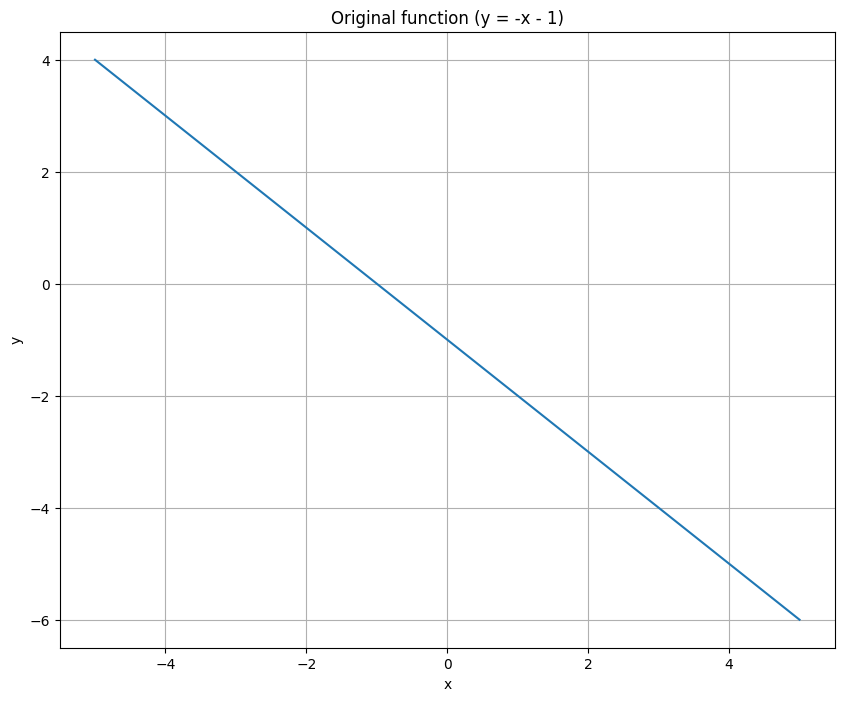

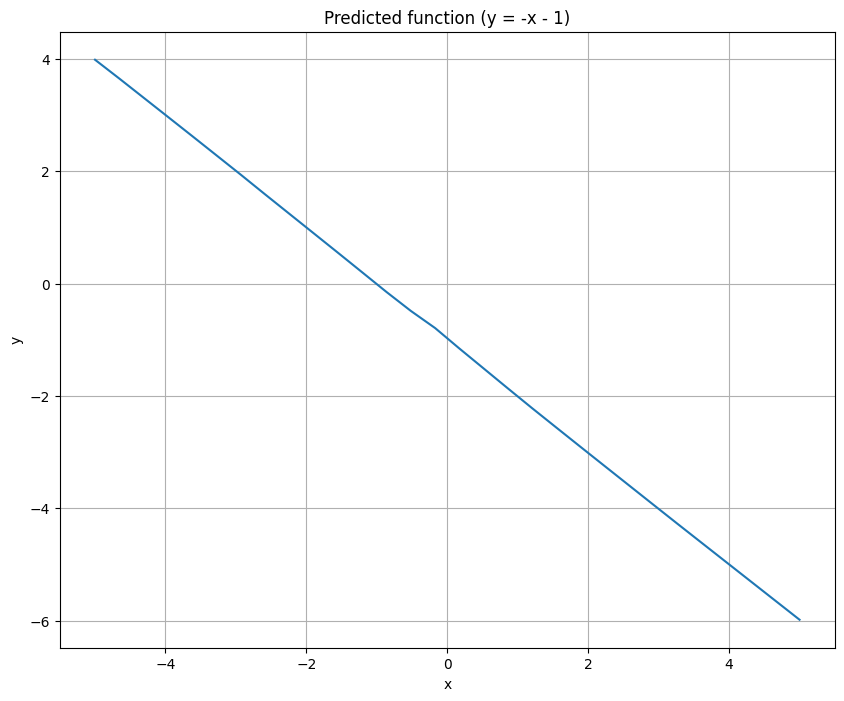

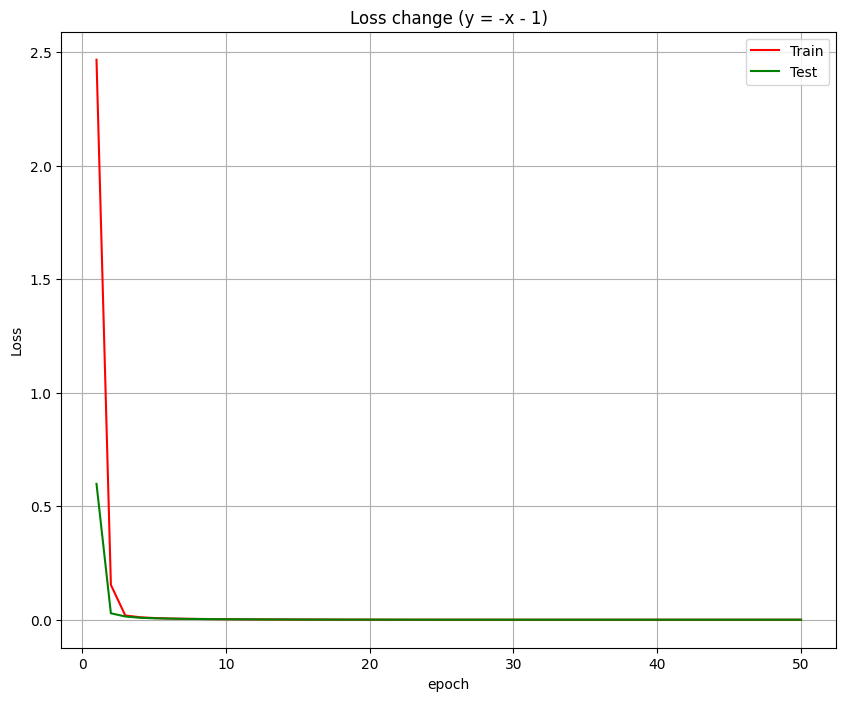

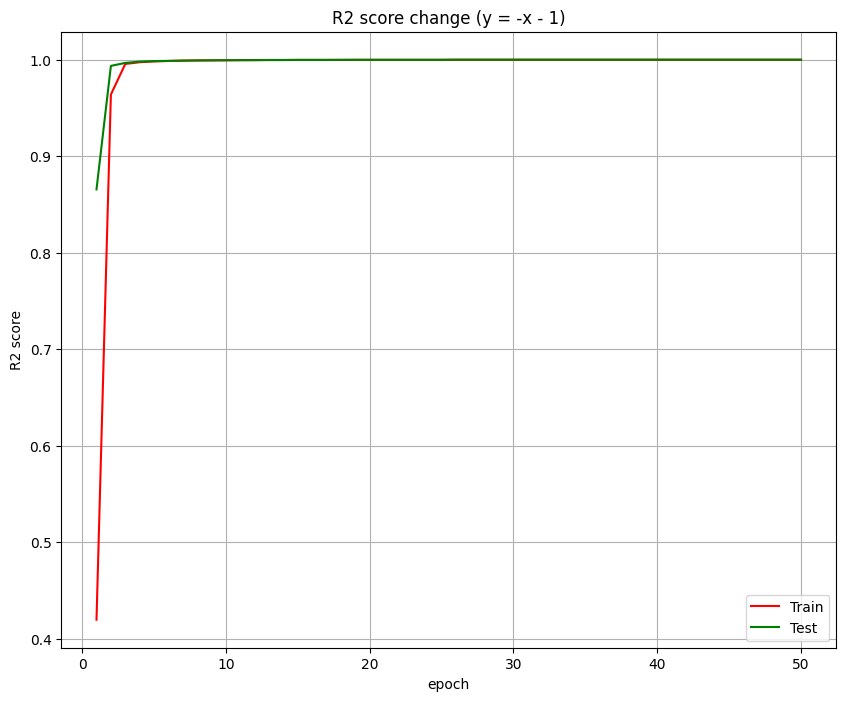

In [10]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = -x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = -x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = -x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = -x - 1)')

## Creating model for predicting values of the quadratic function "y = 0.5 * x**2 + 2 * x - 1" and ploting graphs and changes for loss and r2 score

In [11]:
train_dataset, test_dataset = generate_train_test_data(func_quad)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 30

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/30, train loss: 13.0259, train R2 score: 0.4624, test loss: 2.6545, test R2 score: 0.8968, epoch time: 0.082s
Epoch: 2/30, train loss: 1.9524, train R2 score: 0.9194, test loss: 1.1265, test R2 score: 0.9562, epoch time: 0.081s
Epoch: 3/30, train loss: 1.3235, train R2 score: 0.9454, test loss: 0.8255, test R2 score: 0.9679, epoch time: 0.085s
Epoch: 4/30, train loss: 0.8112, train R2 score: 0.9665, test loss: 0.571, test R2 score: 0.9778, epoch time: 0.084s
Epoch: 5/30, train loss: 0.5341, train R2 score: 0.978, test loss: 0.4461, test R2 score: 0.9827, epoch time: 0.083s
Epoch: 6/30, train loss: 0.4194, train R2 score: 0.9827, test loss: 0.3766, test R2 score: 0.9854, epoch time: 0.084s
Epoch: 7/30, train loss: 0.3773, train R2 score: 0.9844, test loss: 0.2684, test R2 score: 0.9896, epoch time: 0.084s
Epoch: 8/30, train loss: 0.2738, train R2 score: 0.9887, test loss: 0.3014, test R2 score: 0.9883, epoch time: 0.082s
Epoch: 9/30, train loss: 0.1854, train R2 score: 0.9923, 

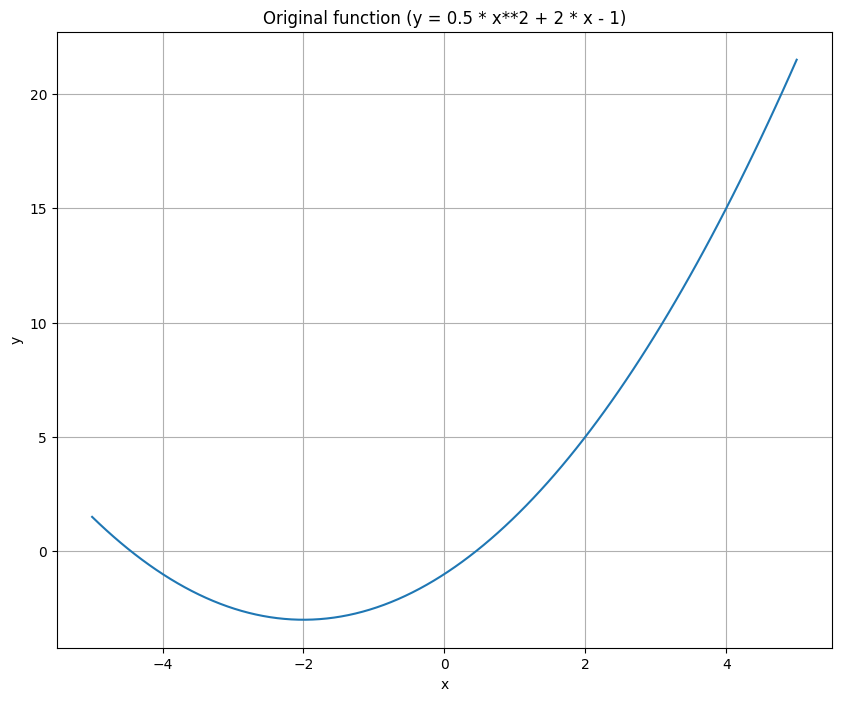

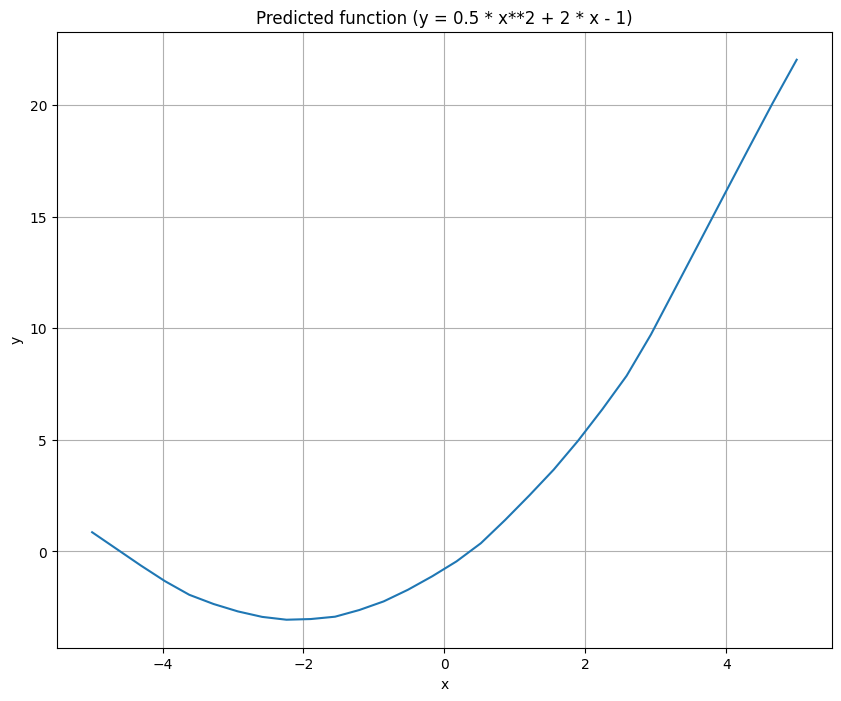

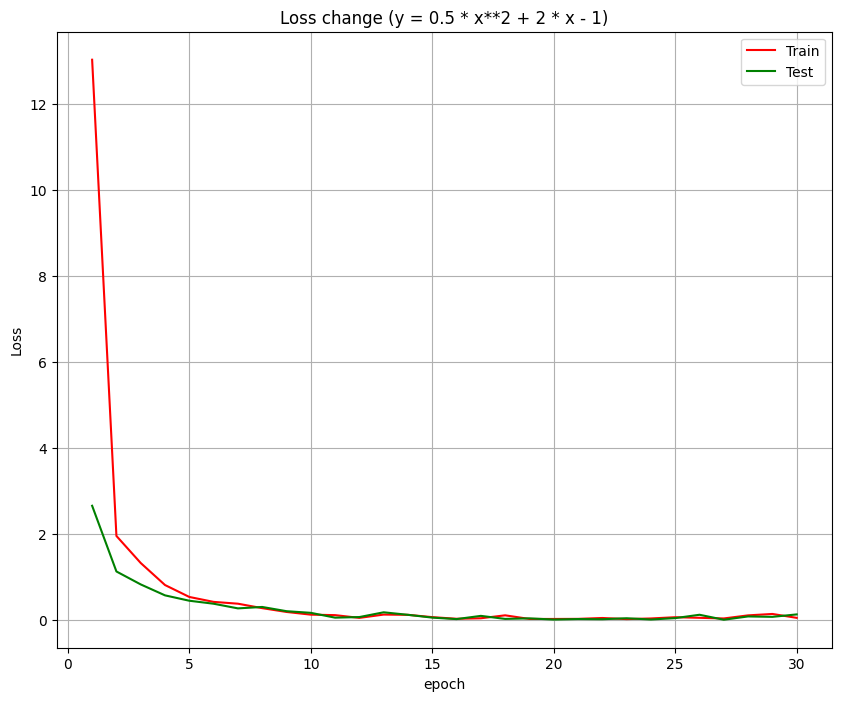

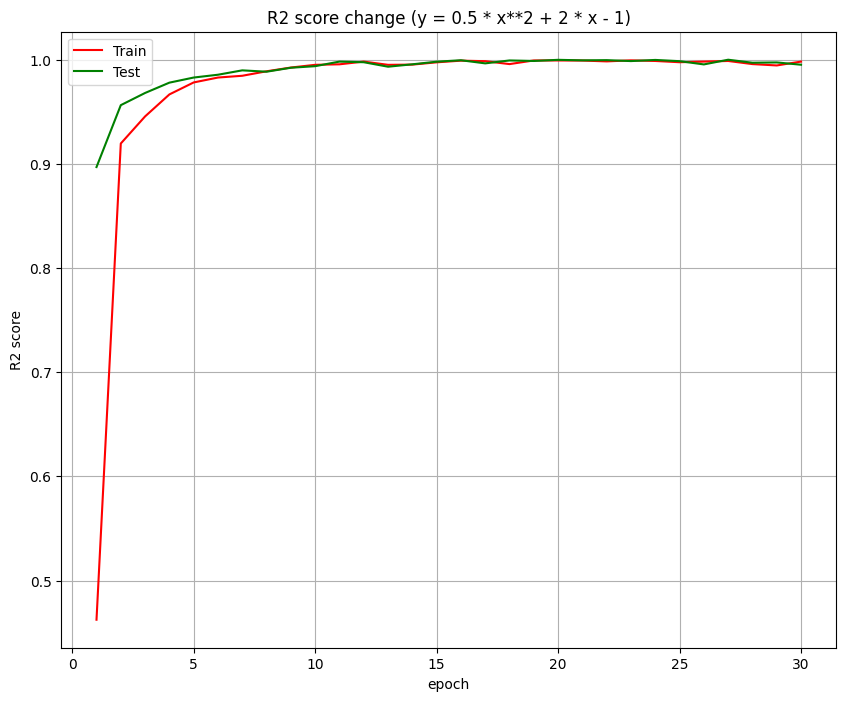

In [12]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = 0.5 * x**2 + 2 * x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = 0.5 * x**2 + 2 * x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = 0.5 * x**2 + 2 * x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = 0.5 * x**2 + 2 * x - 1)')

# Creating model for predicting values of the 3d quadratic function "z = 0.2 * x**2 + 0.2 * y**2" and ploting graphs and changes for loss and r2 score

In [13]:
train_dataset, test_dataset = generate_train_test_data_3d(func_quad_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 2.4132, train R2 score: -0.0037, test loss: 0.5379, test R2 score: 0.7875, epoch time: 1.438s
Epoch: 2/10, train loss: 0.3642, train R2 score: 0.8485, test loss: 0.2214, test R2 score: 0.9125, epoch time: 1.472s
Epoch: 3/10, train loss: 0.1233, train R2 score: 0.9487, test loss: 0.0764, test R2 score: 0.9698, epoch time: 1.441s
Epoch: 4/10, train loss: 0.0424, train R2 score: 0.9824, test loss: 0.0259, test R2 score: 0.9898, epoch time: 1.409s
Epoch: 5/10, train loss: 0.018, train R2 score: 0.9925, test loss: 0.0195, test R2 score: 0.9923, epoch time: 1.392s
Epoch: 6/10, train loss: 0.0083, train R2 score: 0.9965, test loss: 0.0063, test R2 score: 0.9975, epoch time: 1.44s
Epoch: 7/10, train loss: 0.0046, train R2 score: 0.9981, test loss: 0.0065, test R2 score: 0.9974, epoch time: 1.436s
Epoch: 8/10, train loss: 0.0038, train R2 score: 0.9984, test loss: 0.0041, test R2 score: 0.9984, epoch time: 1.453s
Epoch: 9/10, train loss: 0.0023, train R2 score: 0.9991, 

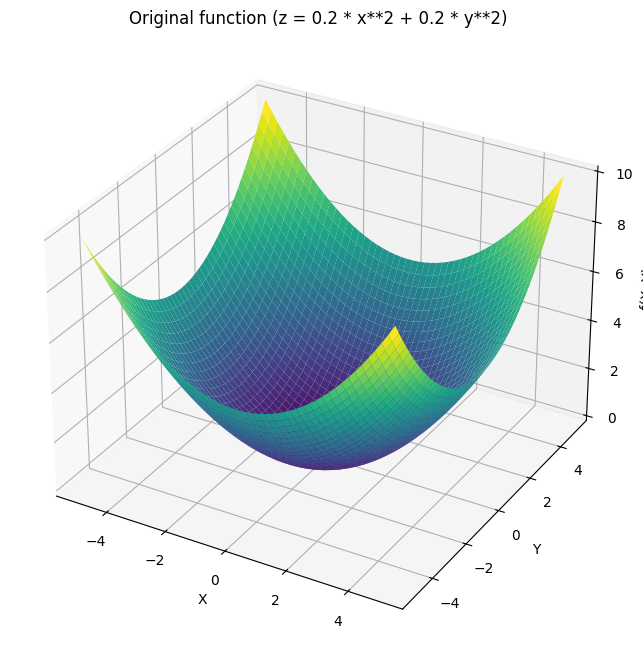

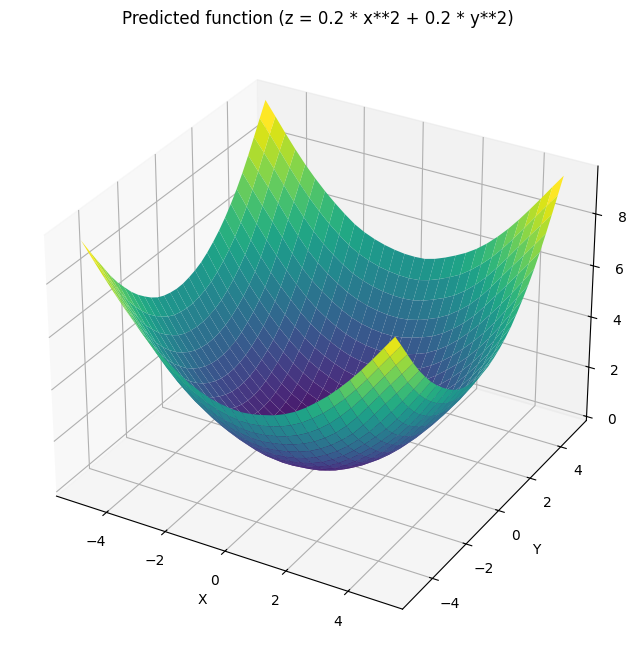

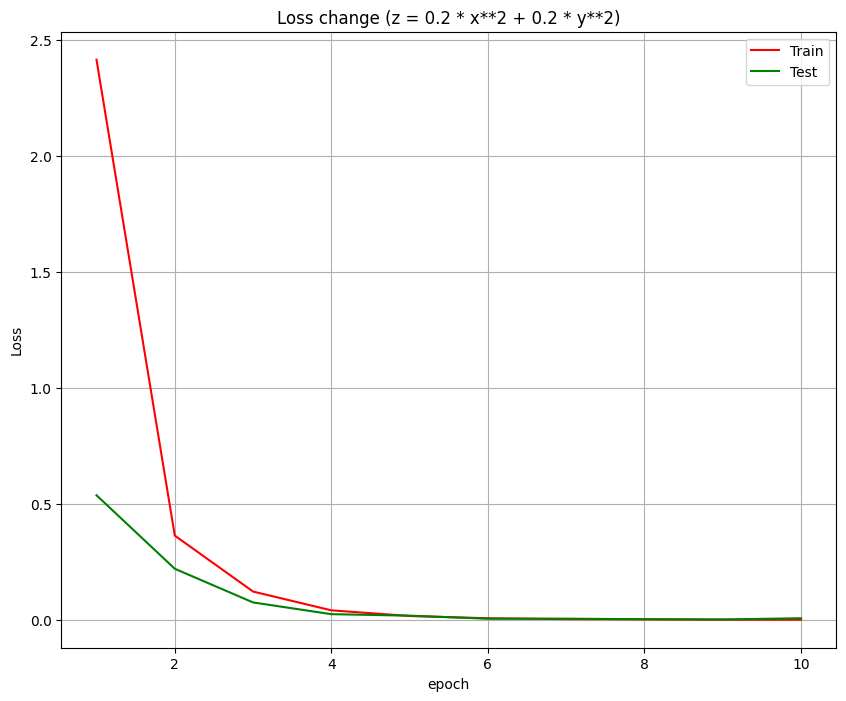

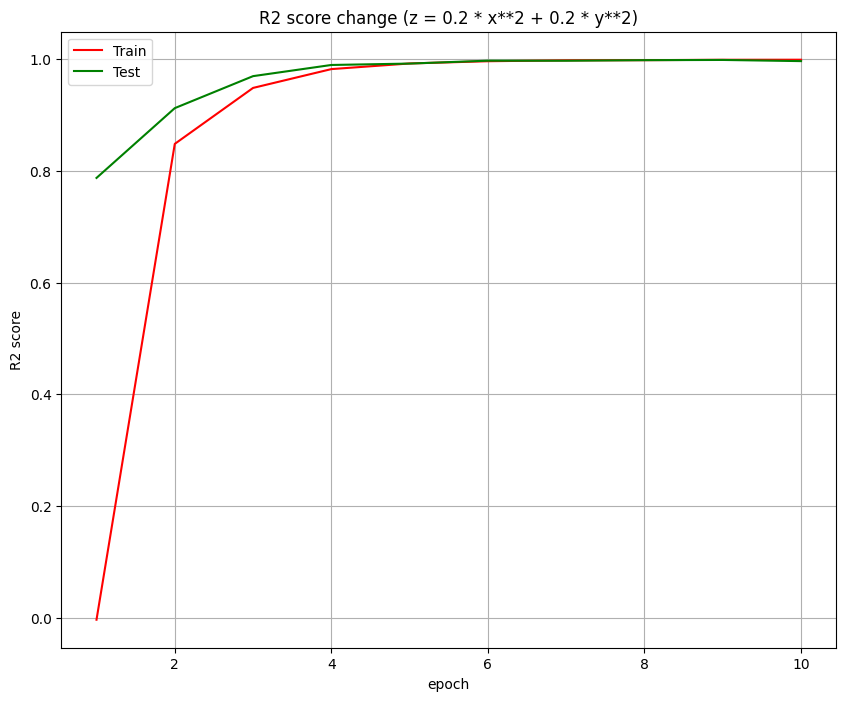

In [14]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = 0.2 * x**2 + 0.2 * y**2)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = 0.2 * x**2 + 0.2 * y**2)')

## Creating model for predicting values of the 3d function "z = sin(x) + cos(y)" and ploting graphs and changes for loss and r2 score

In [15]:
train_dataset, test_dataset = generate_train_test_data_3d(func_sin_plus_cos_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 0.3919, train R2 score: 0.1895, test loss: 0.299, test R2 score: 0.3833, epoch time: 1.26s
Epoch: 2/10, train loss: 0.218, train R2 score: 0.549, test loss: 0.1603, test R2 score: 0.6694, epoch time: 1.259s
Epoch: 3/10, train loss: 0.1118, train R2 score: 0.7688, test loss: 0.0888, test R2 score: 0.8169, epoch time: 1.275s
Epoch: 4/10, train loss: 0.0605, train R2 score: 0.8749, test loss: 0.0523, test R2 score: 0.8921, epoch time: 1.252s
Epoch: 5/10, train loss: 0.0332, train R2 score: 0.9313, test loss: 0.0353, test R2 score: 0.9272, epoch time: 1.249s
Epoch: 6/10, train loss: 0.0181, train R2 score: 0.9625, test loss: 0.0212, test R2 score: 0.9563, epoch time: 1.264s
Epoch: 7/10, train loss: 0.013, train R2 score: 0.973, test loss: 0.0125, test R2 score: 0.9742, epoch time: 1.263s
Epoch: 8/10, train loss: 0.009, train R2 score: 0.9814, test loss: 0.0098, test R2 score: 0.9797, epoch time: 1.261s
Epoch: 9/10, train loss: 0.0071, train R2 score: 0.9853, test l

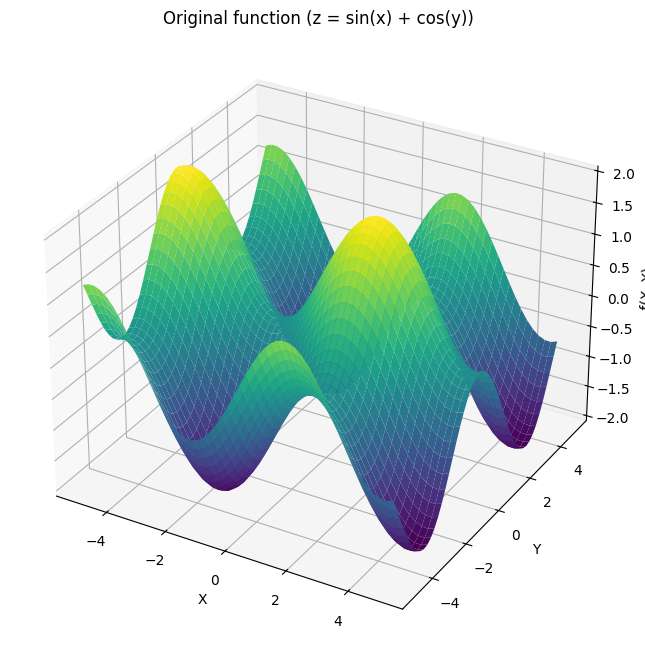

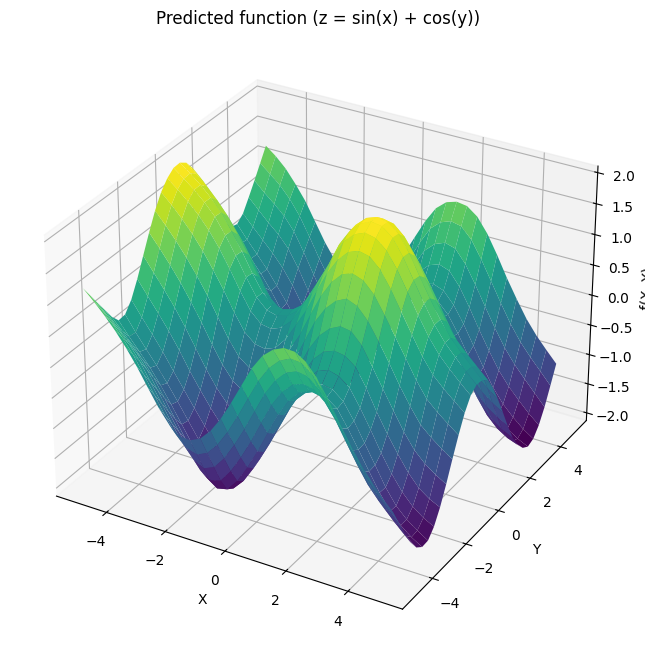

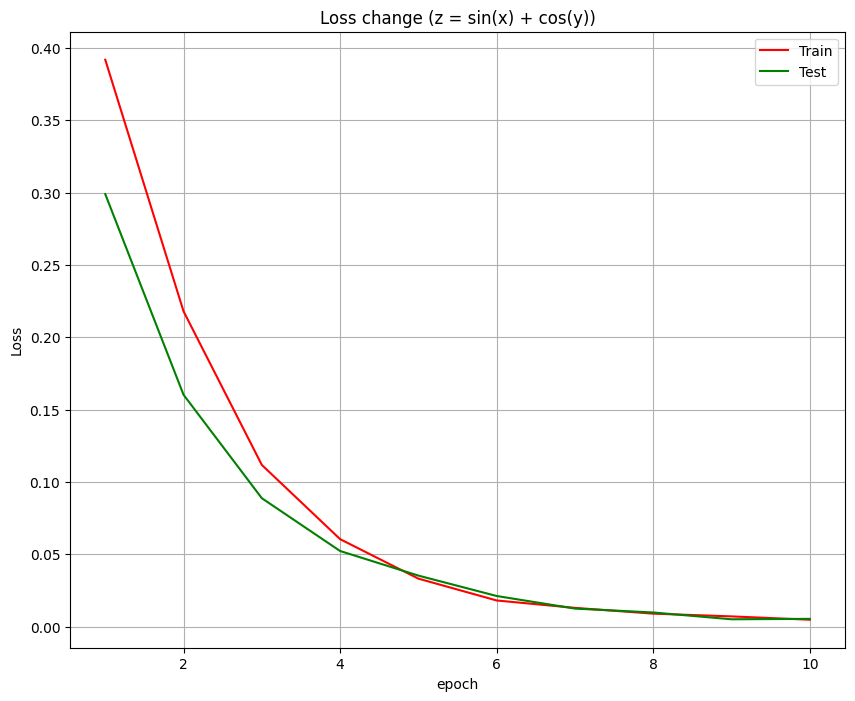

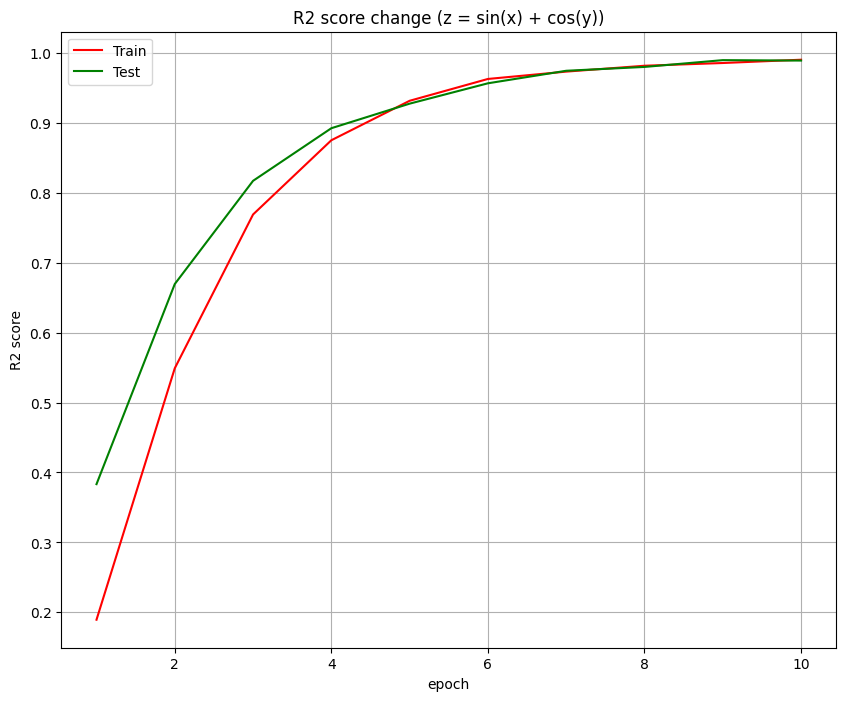

In [16]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = sin(x) + cos(y))'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = sin(x) + cos(y))'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = sin(x) + cos(y))')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = sin(x) + cos(y))')